In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [127]:
df = pd.DataFrame(columns = ['date_trunc','set_point_ventilation_unit', 'house no.'])
freq = []
for i in range (1,11):
    path = '/Users/xinyuyangren/Desktop/Ventilation_Position/' + str(i) + '_ventpos.csv'
    ventpos = pd.read_csv(path)
    ventpos['house no.'] = i
    df = df.append(ventpos)
    
    ## deal with the freq counting
    spv = ventpos.set_point_ventilation_unit
    opr = spv - spv.shift(-1)
    opr = opr[opr!=0] 
    freqno = len (opr)
    freq.append(freqno)
print 'Change frequency:' + str(freq)


Change frequency:[541, 2599, 1267, 242, 34, 1073, 149, 1800, 2081, 109]


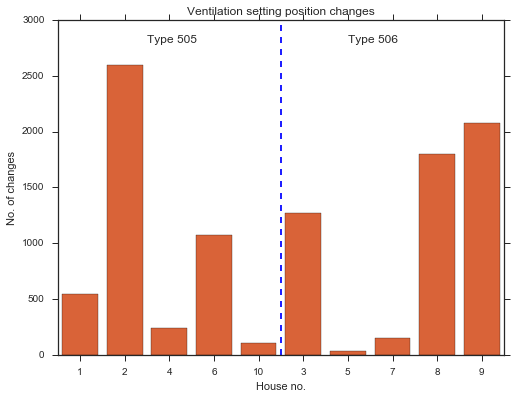

In [128]:
plt.figure(figsize=(8,6))
sns.set(style='ticks')
freq = pd.DataFrame(freq,index=range(1,11))
freq.columns = ['freq']
order = [1,2,4,6,10,3,5,7,8,9]
sns.barplot(x=freq.index, y="freq", data=freq, color = '#F4561D',order = order)
plt.axvline(4.5,c = 'b',ls = 'dashed')
plt.annotate('Type 505',xy = (1,1) , xytext=(1.5, 2800))
plt.annotate('Type 506',xy = (1,1) , xytext=(6, 2800))
plt.title('Ventilation setting position changes')
plt.xlabel('House no.')
plt.ylabel('No. of changes')

In [129]:
df.date_trunc = pd.to_datetime(df.date_trunc)
t = pd.DatetimeIndex(df.date_trunc)
hr = t.hour
df['HourOfDay'] = hr
month = t.month
df['Month'] = month
year = t.year
df['Year'] = year
df_2013 = df[df['Year'] == 2013]
df_2014 = df[df['Year'] == 2014]
df1 = pd.concat([df_2013,df_2014])
#df1 = df1.dropna()

In [130]:
d = df1[(df1['house no.'] == 10) & (df1['Year']==2014)]
d.describe()

,set_point_ventilation_unit,house no.,HourOfDay,Month,Year
count,8754.000000,8754,8754.000000,8754.000000,8754
mean,2.015878,10,11.494517,6.522276,2014
std,0.138867,0,6.921639,3.446249,0
min,1.000000,10,0.000000,1.000000,2014
25%,2.000000,10,5.000000,4.000000,2014
50%,2.000000,10,11.000000,7.000000,2014
75%,2.000000,10,17.000000,10.000000,2014
max,3.000000,10,23.000000,12.000000,2014


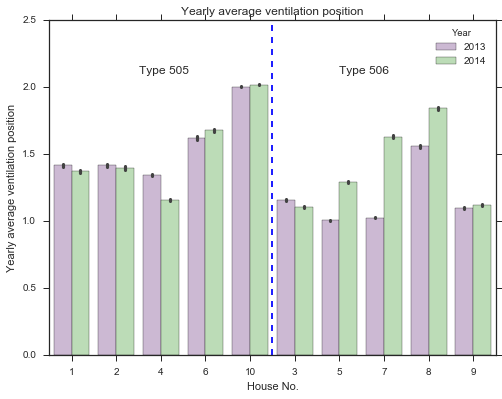

In [131]:
plt.figure(figsize=(8,6))
sns.set(style='ticks')
# Draw a nested boxplot to show bills by day and sex
order = [1,2,4,6,10,3,5,7,8,9]
sns.barplot(x="house no.", y="set_point_ventilation_unit", hue="Year", data=df1, palette="PRGn",order = order)
plt.xlabel('House No.')
plt.ylabel('Yearly average ventilation position')
plt.title('Yearly average ventilation position')
plt.axvline(4.5,c = 'b',ls = 'dashed')
plt.annotate('Type 505',xy = (1,1) , xytext=(1.5, 2.1))
plt.annotate('Type 506',xy = (1,1) , xytext=(6, 2.1))